In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart_v2.csv')

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
df.isna().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [6]:
df[['heart disease']].value_counts()

heart disease
0                150
1                120
dtype: int64

In [7]:
x = df.drop(columns=['heart disease'])

In [8]:
x[:5]

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [9]:
y = df['heart disease']

In [10]:
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

## Train-Test-Split is performed

In [11]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
# shape of x_train,x_test
x_train.shape , x_test.shape

((189, 4), (81, 4))

## import RandomForestClassifier and fit the data.

In [13]:
from sklearn.ensemble import RandomForestClassifier

## create Object

In [14]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=5,
                              n_estimators=100, oob_score=True)

## Training Phase

In [15]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

## Score

In [16]:
model.oob_score_

0.656084656084656

# hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [17]:
model1 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [18]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model1,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [21]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [22]:
grid_search.best_score_

0.6985815602836879

In [23]:
model_best = grid_search.best_estimator_
model_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

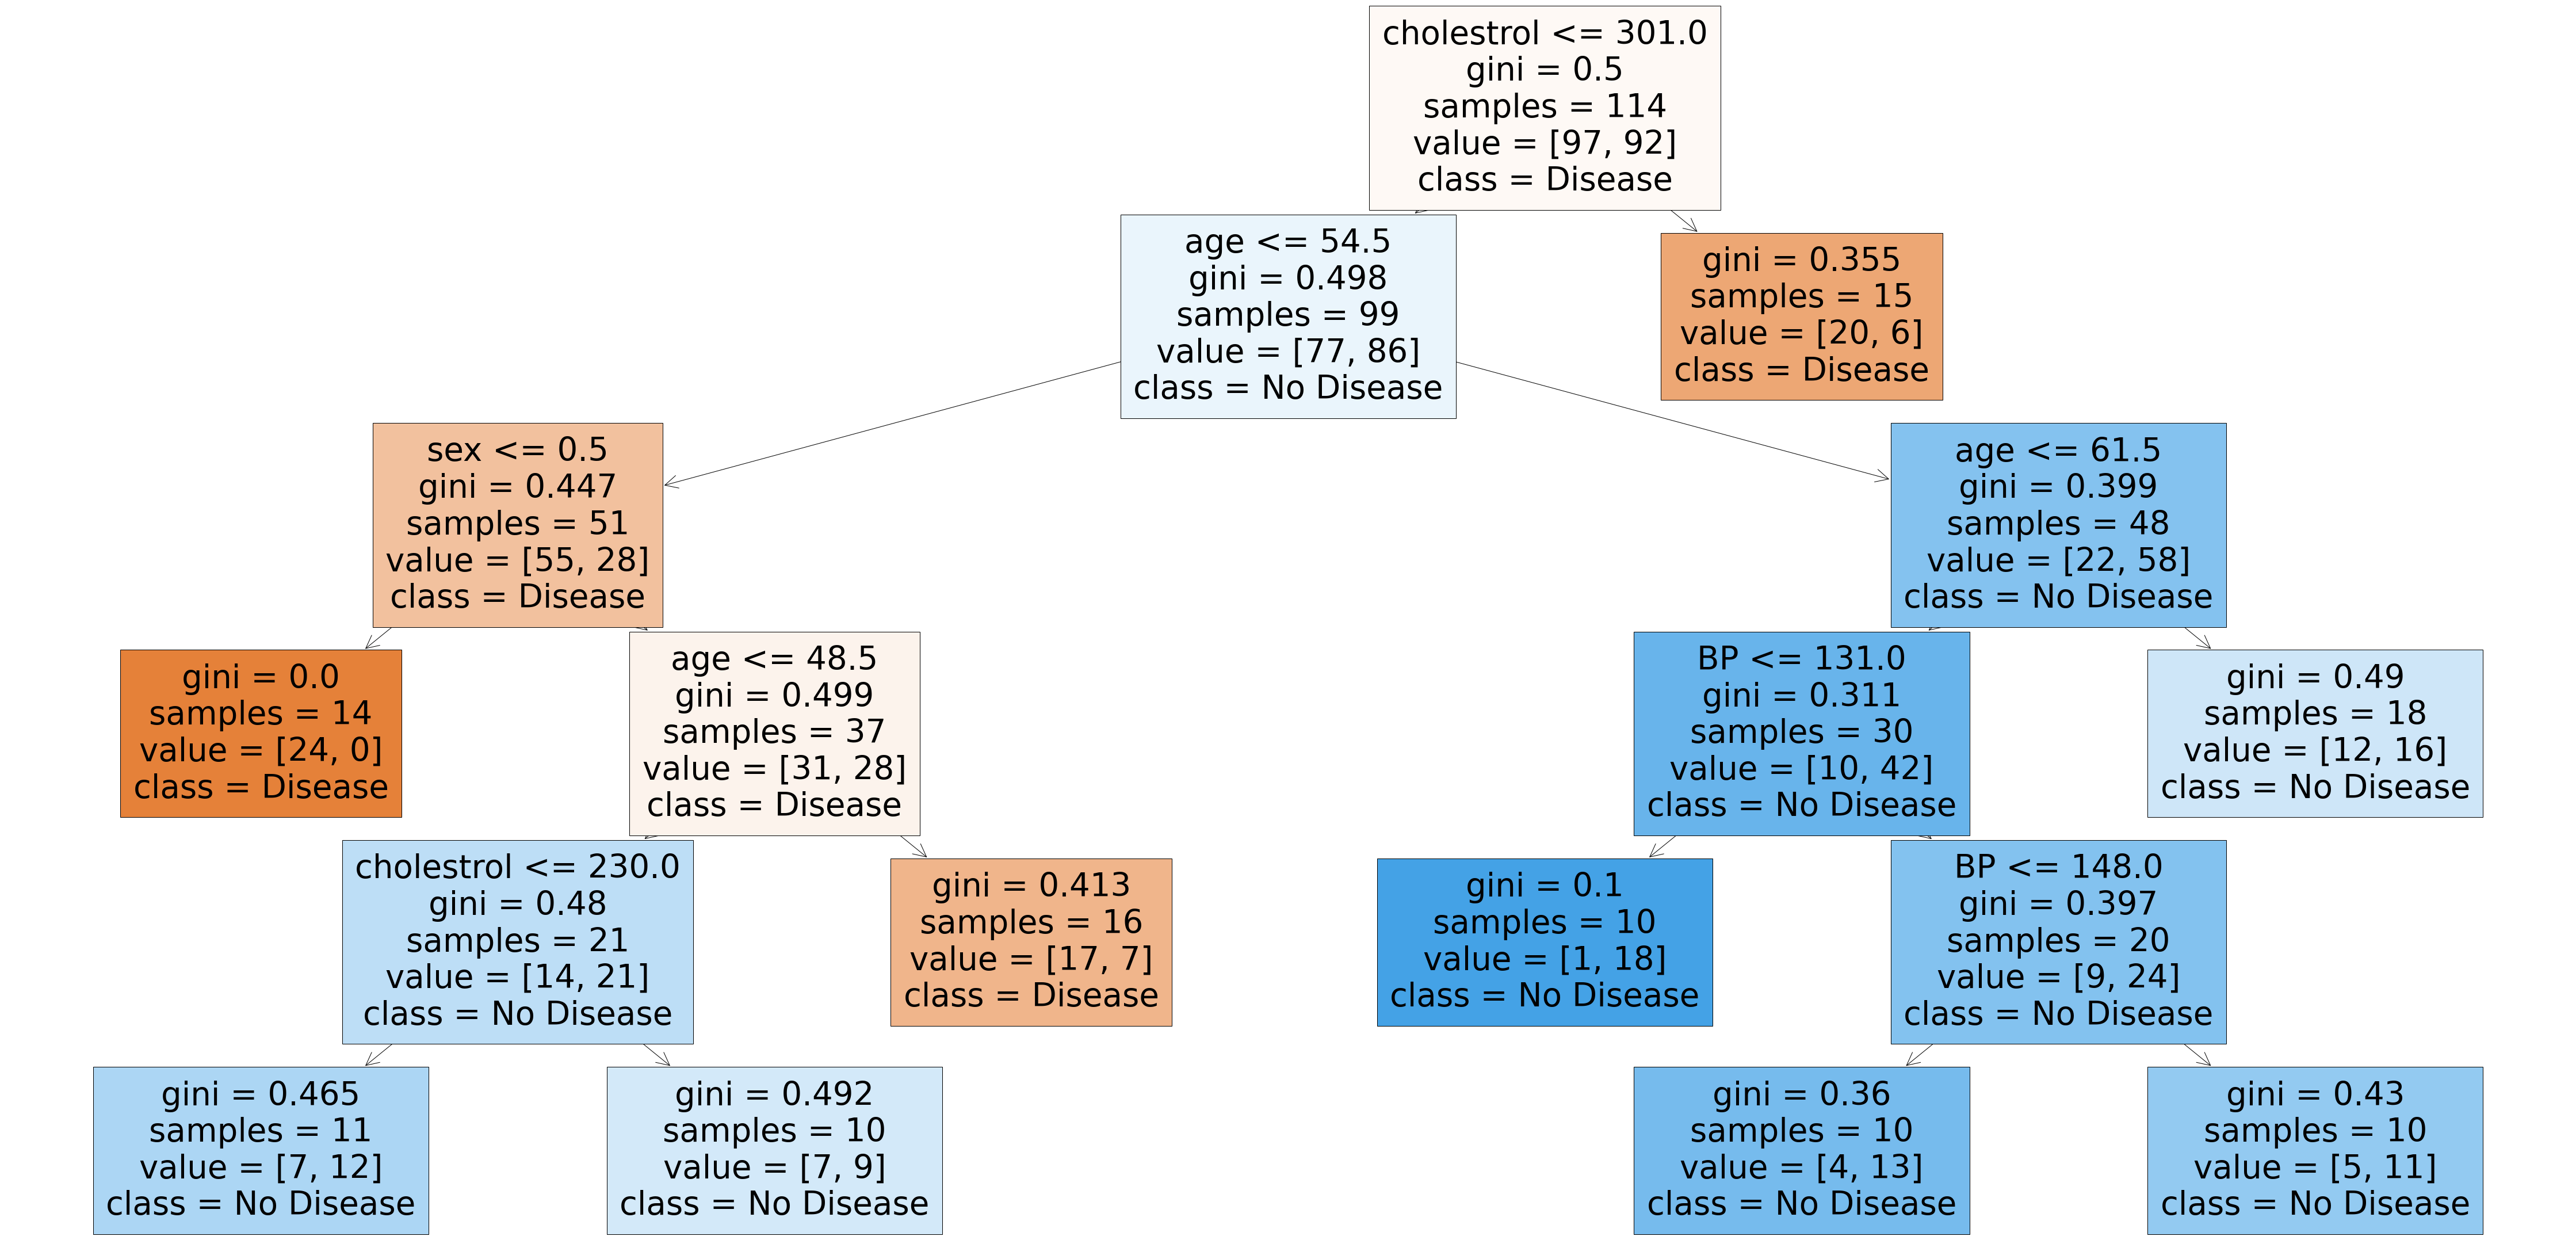

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(model_best.estimators_[5], feature_names = x.columns,class_names=['Disease', "No Disease"],filled=True);

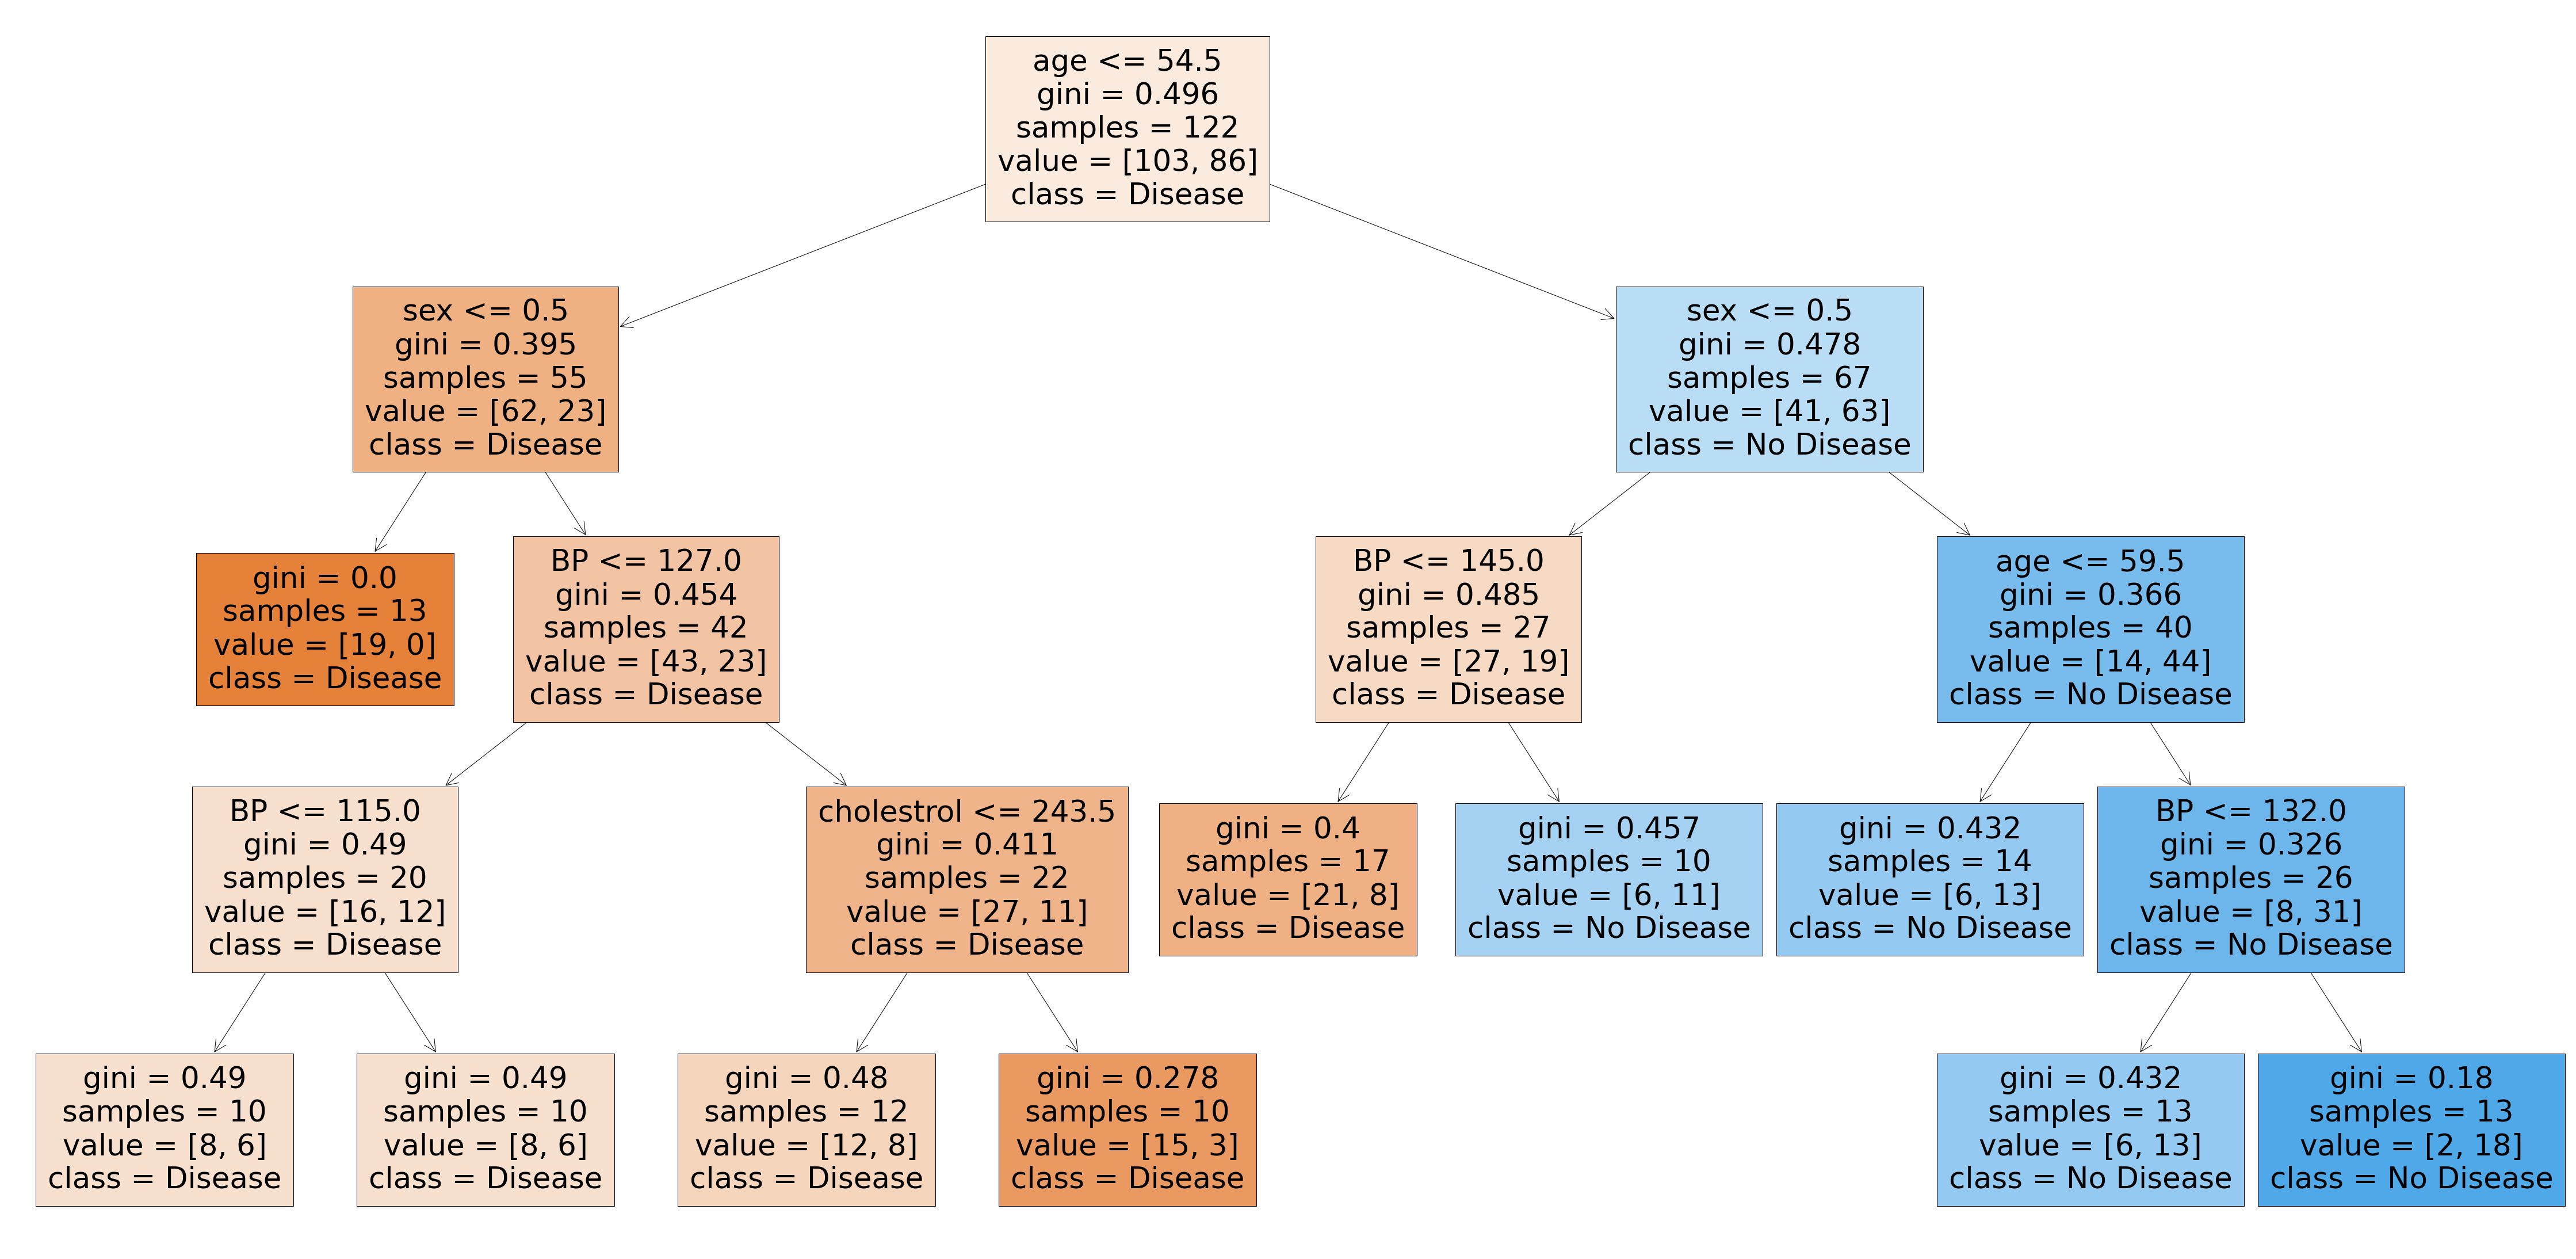

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(model_best.estimators_[7], feature_names = x.columns,class_names=['Disease', "No Disease"],filled=True);

## feature importance

In [26]:
model_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [27]:
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": model_best.feature_importances_
})

In [28]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746
